In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
train=pd.read_csv('train_1.csv')
key=pd.read_csv('key_1.csv')

In [3]:
train_matrix=train.as_matrix()

In [4]:
#count=0
#temp=0
for i in range(145063):
#    for j in range(1,551):
#        if not math.isnan(train_matrix[i][j]):
#            temp=temp+train_matrix[i][j]
#            count=count+1
#            avg=temp/count
    for j in range(1,551):
        if math.isnan(train_matrix[i][j]):
            train_matrix[i][j]=0
#    count=0
#    temp=0

In [5]:
#scaler = preprocessing.MinMaxScaler()
#a=train_matrix[:,1:552]
#scaler.fit(a)
#train_matrix[:,1:552]=scaler.transform(a)
train_matrix.shape

(145063, 551)

In [33]:
def next_batch(iter,X_train,n_steps,batch_size):
    import numpy as np
    temp1=int(iter/61)
    temp2=iter-temp1*(61)
    #return X_train[0+1*temp1:1+1*temp1,1+temp2:n_steps+1+temp2]
    X=np.zeros(((551-n_steps)*batch_size,n_steps))
    Y=np.zeros(((551-n_steps)*batch_size,n_steps))
    for j in range(batch_size):
        for i in range(551-n_steps):
            Y[j*(551-n_steps)+i,:]=X_train[1*temp1:1+1*temp1,1+i:n_steps+1+i]
            if i<(551-n_steps-1):
                X[i+1,:]=X_train[temp+1*temp1:temp+1+1*temp1,1+i:n_steps+1+i]
    return X,Y
    

In [7]:
n_steps =20
n_inputs = 1
n_neurons = 30
n_outputs = 1
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
#cell1 = tf.contrib.rnn.OutputProjectionWrapper(
#cell1=tf.contrib.rnn.BasicLSTMCell(num_units=60,
#activation=tf.nn.relu,reuse=tf.get_variable_scope().reuse)#,output_size=n_outputs)
cell2 = tf.contrib.rnn.OutputProjectionWrapper(
tf.contrib.rnn.BasicLSTMCell(num_units=20,
activation=tf.nn.tanh,reuse=tf.get_variable_scope().reuse),
output_size=n_outputs)
cells=tf.contrib.rnn.MultiRNNCell([cell2])
with tf.variable_scope('lstm8'):
    outputs, states = tf.nn.dynamic_rnn(cells, X, dtype=tf.float32)
learning_rate = 0.01
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()
n_iterations = 10000 #173370


304 	MSE: 0.0


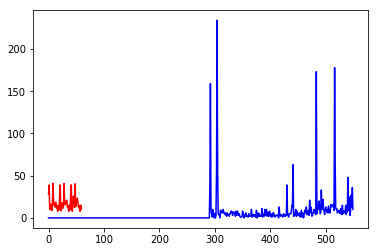

609 	MSE: 0.0


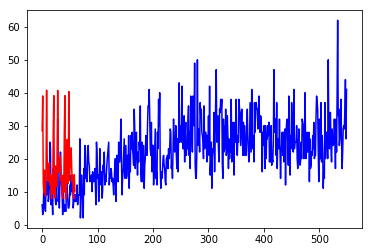

In [ ]:
batch_size = 100
Output=np.zeros((145063,60))
X_batch=np.zeros(((551-n_steps)*100,n_steps,1))
y_batch=np.zeros(((551-n_steps)*100,n_steps,1))
with tf.Session() as sess:
    init.run()
    count=0
    out_temp=0
    temp_count=0
    num=10397
    a=[]
    for iteration in range(500*60):
        X_batch=y_batch
#        if iteration>10000:
#            if out_temp==60 or iteration==10001:
#                temp_count=temp_count+1
#                num=num+581
#                temp_y = next_batch(num,train_matrix)
#                X_batch[0,:,0]=temp_y
#                out_temp=0
#            y_batch=outputs.eval(feed_dict={X: X_batch})
#            Output[800+2*temp_count:850+2*temp_count,out_temp]=y_batch[:,29,0]
#            out_temp=out_temp+1
#        else:
        if count < 1:
            temp_x,temp_y = next_batch(iteration,train_matrix,n_steps,batch_size)
            X_batch[:,:,0]=temp_x
            y_batch[:,:,0]=temp_y
            if iteration<2:
                for temp in range(300):
                    sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            count=count+1
        else:
            y_batch=outputs.eval(feed_dict={X: X_batch})
            count=count+1
            out=np.zeros((batch_size,n_steps))
            c=0
            for i in range(len(y_batch[:,0,0])):
                if i%(551-n_steps)==0:
                    out[c,:]=y_batch[i,0:n_steps,0]
                    c=c+1
            if out_temp==19 or out_temp==39 or out_temp==59:
                Output[batch_size*int(iteration/62):batch_size+batch_size*int(iteration/62),out_temp-19:out_temp+1]=out#y_batch[551-n_steps-1:10*(551-n_steps)-1,n_steps-20:n_steps,0]
            out_temp=out_temp+1
            #plt.plot(X_batch[551-n_steps-1,:,0],'b')
            #plt.plot(y_batch[551-n_steps-1,:,0],'r')
            #plt.show()
            #print(X_batch)
            #print(y_batch)
        if count>60:
            count=0
            out_temp=0
            #print('ínitialized')
            #sess.run(init)
        
        if (iteration+1) % (61*5) == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            plt.plot(train_matrix[int(iteration/63),1:552],'b')
            plt.plot(Output[int(iteration/63),:],'r')
            plt.show()
            #np.save('Output.npy',Output)
            #np.save('iteration.npy',iteration)
            
            

In [10]:
Output=train_matrix[:,491:553]

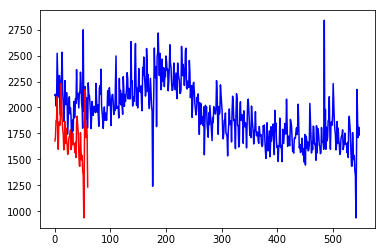

In [16]:
plt.plot(train_matrix[140000,1:550],'b')
plt.plot(Output[140000,:],'r')
plt.show()

In [17]:
result=np.zeros((145063*60))

In [18]:
a=list(key['Page'])

In [23]:

for i in range(145063):
    ind=d_pages[train_matrix[i,0]+'_2017-01-01'][1]
    for x in range(60):
        result[ind+x]=Output[i,x]

In [55]:
new_out=[0]*len(a)
for i in range(len(a)):
    new_out[i]=round(result[i])

In [24]:
key['Visits']=result

In [25]:
out=key.drop(['Page'],axis=1)

In [26]:
out

,Id,Visits
0,bf4edcf969af,5.0
1,929ed2bf52b9,4.0
2,ff29d0f51d5c,4.0
3,e98873359be6,8.0
4,fa012434263a,5.0
5,48f1e93517a2,6.0
6,5def418fcb36,6.0
7,77bd08134351,4.0
8,5889e6dbb16f,4.0
9,5f21fef1d764,4.0


In [27]:
out.to_csv('output.csv',index=False)

In [20]:
ids = key.Id.values
pages = key.Page.values

print('key_1...')
d_pages = {}
for id, page in zip(ids, pages):
    d_pages[page[:-11]] = id

key_1...


In [53]:
Output=np.load('Output.npy')

In [21]:
Output[100000,:]

array([ 28.95226479,  39.09728241,   9.35251045,   8.84757805,
        10.89528847,  19.19665909,  31.0532856 ,  14.90350533,
        36.46200943,  16.78265381,   7.53097916,   8.76243019,
        13.32134628,  10.41943932,   9.21129417,   9.98008728,
         8.75667763,  10.38202286,   3.72044086,   5.67787123,
        -0.37446284,  31.57264137,  39.4058342 ,  11.23826408,
         6.97914648,   2.66489553,   0.48978174,   7.50583124,
         1.85687912,   0.18525147,   1.61347365,   0.29074621,
         6.07569838,  11.11280441,  11.68214035,   3.97356725,
         0.61474097,   5.4796772 ,   9.83257103,  12.61462402,
        -0.37446308,  31.57264137,  39.40584946,  11.10571671,
         7.80070639,   3.25291824,   0.61433375,   6.92694092,
         1.62512493,   0.16406989,   0.41837692,   0.16216242,
         6.25041103,  13.05479813,  14.95643997,   5.46216631,
         1.38045704,   4.75572109,  10.67420959,  16.33658981])

In [ ]:
new_out=[0]*145063
for i in range(145063):
    new_out[i]=round([i])

In [21]:
d_pages = {}
count=0
for id, page in zip(ids, pages):
    d_pages[page] =[id,count] 
    count+=1

In [22]:
d_pages[train_matrix[0,0]+'_2017-01-01'][1]

111180

In [13]:
d_pages=='!vote_en.wikipedia.org_all-access_all-agents'

False

In [37]:
a=list(key['Page'])
a.index(train_matrix[0,0]+'_2017-01-01')

111180

In [38]:
a

['!vote_en.wikipedia.org_all-access_all-agents_2017-01-01',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-02',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-03',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-04',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-05',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-06',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-07',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-08',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-09',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-10',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-11',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-12',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-13',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-14',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-15',
 '!vote_en.wikipedia.org_all-access_all-agents_2017-01-16',
 '!vote_en.wikipedia.org_all-access_all-